In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [ ]:
print('trainset size: ',train_data.shape)
print('testset size: ',test_data.shape)

trainset size:  (60000, 785)
testset size:  (10000, 785)


In [ ]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = train_data.drop('label', axis = 1)
y_train = train_data['label']

X_test = test_data.drop('label', axis = 1)
y_test = test_data['label']

In [ ]:
print('trainset size: ',X_train.shape)
print('testset size: ',X_test.shape)

trainset size:  (60000, 784)
testset size:  (10000, 784)


In [ ]:
new_model = MLPClassifier(hidden_layer_sizes=(100,100),
                          max_iter = 500,
                          activation = 'tanh',
                          solver = 'sgd',
                          learning_rate_init = 0.001,
                          learning_rate = 'constant',
                          random_state = 42)

In [ ]:
new_model.fit(X_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=500,
              random_state=42, solver='sgd')

In [ ]:
y_test_pred = new_model.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(test_accuracy)

0.9628


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

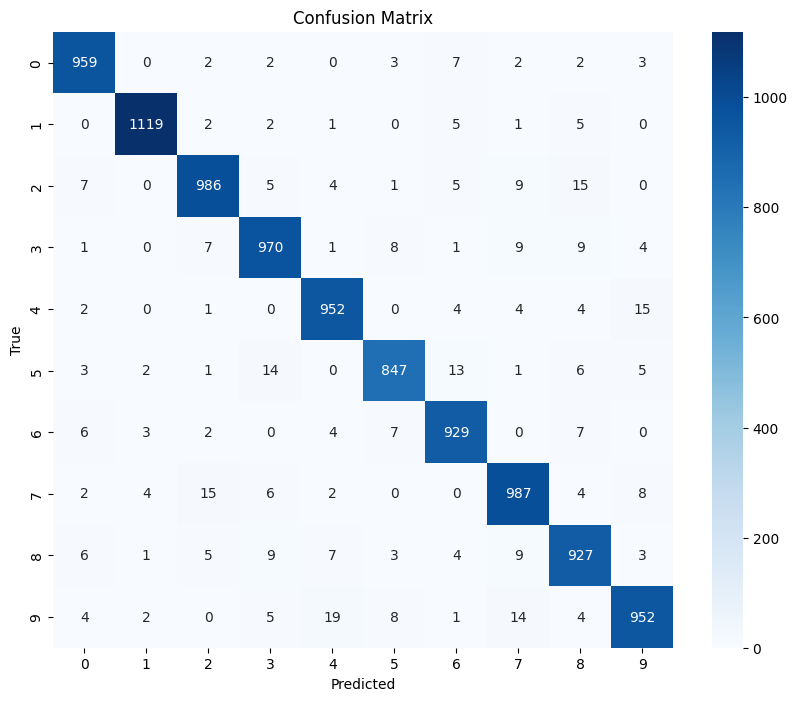

Precision:  0.9628430790036888
Recall Score:  0.9628
F1 Score:  0.9627928487290294
Classification Report               precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.96       958
           7       0.95      0.96      0.96      1028
           8       0.94      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
y_pred = new_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

class_report = classification_report(y_test, y_pred)

plt.figure(figsize =(10,8))
sns.heatmap(conf_matrix, annot =True, fmt='d', cmap='Blues', xticklabels = range(10), yticklabels = range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print("Precision: ",precision)
print("Recall Score: ",recall)
print("F1 Score: ",f1)
print("Classification Report", class_report)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images = train_images.reshape(60000, 28,28,1)
test_images = test_images.reshape(10000, 28,28,1)

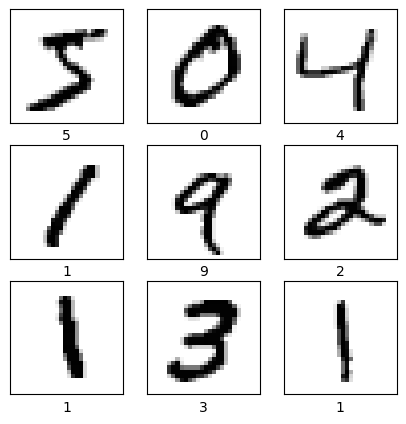

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation ='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
                           ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size = 32, epochs =5, validation_split = 0.1 )


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 38ms/step - accuracy: 0.8808 - loss: 0.3785 - val_accuracy: 0.9878 - val_loss: 0.0467
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9873 - val_loss: 0.0452
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 99s 52ms/step - accuracy: 0.9904 - loss: 0.0327 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 103s 29ms/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.9887 - val_loss: 0.0420
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9917 - val_loss: 0.0294


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9886 - loss: 0.0373
Test accuracy: 0.9911999702453613


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


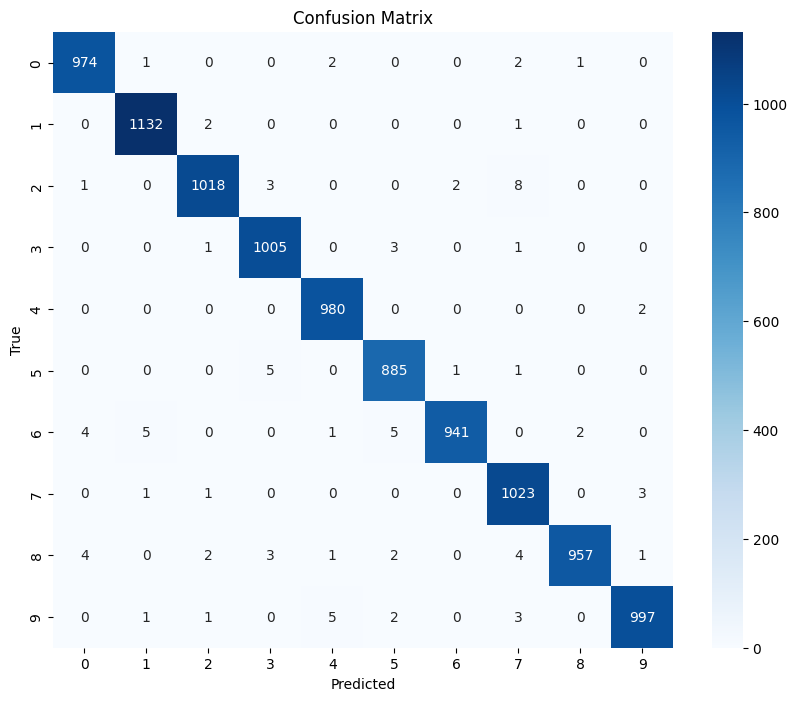

Precision:  0.9912373798731811
Recall Score:  0.9912
F1 Score:  0.9911975296139206
Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
prediction = model.predict(test_images)

predicted_labels = np.argmax(prediction, axis=1)

conf_matrix = confusion_matrix(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

class_report = classification_report(test_labels, predicted_labels)

plt.figure(figsize =(10,8))
sns.heatmap(conf_matrix, annot =True, fmt='d', cmap='Blues', xticklabels = range(10), yticklabels = range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print("Precision: ",precision)
print("Recall Score: ",recall)
print("F1 Score: ",f1)
print("Classification Report", class_report)
